# Calculating the correlation between home values and the crime rate in each neighborhood for violent and non-violent crimes.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

In [2]:
# Create a reference the CSV files desired
csv_path ="nonviolent_crimes_regression.csv"
csv_path_1="violent_crimes_regression.csv"
csv_path_3="population_neighborhood.csv"
csv_path_4 = "zillow_regression.csv"

#Read the csvs
violent_df= pd.read_csv(csv_path)
nonviolent_df = pd.read_csv(csv_path_1)
population_df= pd.read_csv(csv_path_3)
zillow_df = pd.read_csv(csv_path_4)

# Print the Data Frame
violent_df

,Analysis Neighborhood,Incident Year-Month,Incident Datetime
0,Bayview Hunters Point,2018-01,153
1,Bayview Hunters Point,2018-02,103
2,Bayview Hunters Point,2018-03,144
3,Bayview Hunters Point,2018-04,134
4,Bayview Hunters Point,2018-05,118
...,...,...,...
2407,Western Addition,2022-08,64
2408,Western Addition,2022-09,59
2409,Western Addition,2022-10,65
2410,Western Addition,2022-11,52


In [3]:
nonviolent_df 

,Analysis Neighborhood,Incident Year-Month,Incident Datetime
0,Bayview Hunters Point,2018-01,209
1,Bayview Hunters Point,2018-02,188
2,Bayview Hunters Point,2018-03,202
3,Bayview Hunters Point,2018-04,206
4,Bayview Hunters Point,2018-05,218
...,...,...,...
2452,Western Addition,2022-08,103
2453,Western Addition,2022-09,130
2454,Western Addition,2022-10,129
2455,Western Addition,2022-11,117


In [4]:
violent_df_index = violent_df.reset_index(drop=True)
violent_df_index

,Analysis Neighborhood,Incident Year-Month,Incident Datetime
0,Bayview Hunters Point,2018-01,153
1,Bayview Hunters Point,2018-02,103
2,Bayview Hunters Point,2018-03,144
3,Bayview Hunters Point,2018-04,134
4,Bayview Hunters Point,2018-05,118
...,...,...,...
2407,Western Addition,2022-08,64
2408,Western Addition,2022-09,59
2409,Western Addition,2022-10,65
2410,Western Addition,2022-11,52


In [5]:
#Rename columns to merge witht the zillow data frame later.
violent_df_index_rename = violent_df_index.rename(columns={"Analysis Neighborhood":"Neighborhood","Incident Year-Month":"Date","Incident Datetime":"Number of Crimes"})
violent_df_index_rename

,Neighborhood,Date,Number of Crimes
0,Bayview Hunters Point,2018-01,153
1,Bayview Hunters Point,2018-02,103
2,Bayview Hunters Point,2018-03,144
3,Bayview Hunters Point,2018-04,134
4,Bayview Hunters Point,2018-05,118
...,...,...,...
2407,Western Addition,2022-08,64
2408,Western Addition,2022-09,59
2409,Western Addition,2022-10,65
2410,Western Addition,2022-11,52


In [6]:
#Rename columns to merge witht the zillow data frame later.
nonviolent_df_rename = nonviolent_df.rename(columns={"Analysis Neighborhood":"Neighborhood","Incident Year-Month":"Date","Incident Datetime":"Number of Crimes"})
nonviolent_df_rename

,Neighborhood,Date,Number of Crimes
0,Bayview Hunters Point,2018-01,209
1,Bayview Hunters Point,2018-02,188
2,Bayview Hunters Point,2018-03,202
3,Bayview Hunters Point,2018-04,206
4,Bayview Hunters Point,2018-05,218
...,...,...,...
2452,Western Addition,2022-08,103
2453,Western Addition,2022-09,130
2454,Western Addition,2022-10,129
2455,Western Addition,2022-11,117


In [7]:
non_violent_df_rename=nonviolent_df_rename[["Neighborhood","Date","Number of Crimes"]]
non_violent_df_rename

,Neighborhood,Date,Number of Crimes
0,Bayview Hunters Point,2018-01,209
1,Bayview Hunters Point,2018-02,188
2,Bayview Hunters Point,2018-03,202
3,Bayview Hunters Point,2018-04,206
4,Bayview Hunters Point,2018-05,218
...,...,...,...
2452,Western Addition,2022-08,103
2453,Western Addition,2022-09,130
2454,Western Addition,2022-10,129
2455,Western Addition,2022-11,117


In [8]:
#Merge the zillow data frame with the data frames for violent and non violent crimes
merge_violent_crimes_df = pd.merge(violent_df_index_rename,zillow_df,on=["Neighborhood","Date"])
merge_nonviolent_crimes_df=pd.merge(non_violent_df_rename,zillow_df,on=["Neighborhood","Date"])

In [9]:
merge_violent_crimes_df

,Neighborhood,Date,Number of Crimes,Price
0,Bayview Hunters Point,2018-01,153,8.313694e+05
1,Bayview Hunters Point,2018-02,103,8.368342e+05
2,Bayview Hunters Point,2018-03,144,8.423898e+05
3,Bayview Hunters Point,2018-04,134,8.467867e+05
4,Bayview Hunters Point,2018-05,118,8.547810e+05
...,...,...,...,...
2019,Western Addition,2022-08,64,1.105756e+06
2020,Western Addition,2022-09,59,1.082914e+06
2021,Western Addition,2022-10,65,1.064080e+06
2022,Western Addition,2022-11,52,1.049605e+06


In [10]:
merge_nonviolent_crimes_df

,Neighborhood,Date,Number of Crimes,Price
0,Bayview Hunters Point,2018-01,209,8.313694e+05
1,Bayview Hunters Point,2018-02,188,8.368342e+05
2,Bayview Hunters Point,2018-03,202,8.423898e+05
3,Bayview Hunters Point,2018-04,206,8.467867e+05
4,Bayview Hunters Point,2018-05,218,8.547810e+05
...,...,...,...,...
2034,Western Addition,2022-08,103,1.105756e+06
2035,Western Addition,2022-09,130,1.082914e+06
2036,Western Addition,2022-10,129,1.064080e+06
2037,Western Addition,2022-11,117,1.049605e+06


In [11]:
#Merging violent and non violent data frames with the population to get the crime rate.
violent_crimes_population = pd.merge(merge_violent_crimes_df,population_df,on=["Neighborhood"])
nonviolent_crimes_population = pd.merge(merge_nonviolent_crimes_df,population_df,on=["Neighborhood"])
violent_crimes_population 


,Neighborhood,Date,Number of Crimes,Price,Population
0,Bayview Hunters Point,2018-01,153,8.313694e+05,38480.0
1,Bayview Hunters Point,2018-02,103,8.368342e+05,38480.0
2,Bayview Hunters Point,2018-03,144,8.423898e+05,38480.0
3,Bayview Hunters Point,2018-04,134,8.467867e+05,38480.0
4,Bayview Hunters Point,2018-05,118,8.547810e+05,38480.0
...,...,...,...,...,...
2019,Western Addition,2022-08,64,1.105756e+06,22299.0
2020,Western Addition,2022-09,59,1.082914e+06,22299.0
2021,Western Addition,2022-10,65,1.064080e+06,22299.0
2022,Western Addition,2022-11,52,1.049605e+06,22299.0


In [12]:
nonviolent_crimes_population

,Neighborhood,Date,Number of Crimes,Price,Population
0,Bayview Hunters Point,2018-01,209,8.313694e+05,38480.0
1,Bayview Hunters Point,2018-02,188,8.368342e+05,38480.0
2,Bayview Hunters Point,2018-03,202,8.423898e+05,38480.0
3,Bayview Hunters Point,2018-04,206,8.467867e+05,38480.0
4,Bayview Hunters Point,2018-05,218,8.547810e+05,38480.0
...,...,...,...,...,...
2034,Western Addition,2022-08,103,1.105756e+06,22299.0
2035,Western Addition,2022-09,130,1.082914e+06,22299.0
2036,Western Addition,2022-10,129,1.064080e+06,22299.0
2037,Western Addition,2022-11,117,1.049605e+06,22299.0


In [13]:
#Getting the crime rate per violent and non violent crimes.
violent_crimes_population["Crime Rate"] =(violent_crimes_population ["Number of Crimes"]/violent_crimes_population["Population"])*10000
nonviolent_crimes_population["Crime Rate"] =(nonviolent_crimes_population ["Number of Crimes"]/nonviolent_crimes_population["Population"])*10000
violent_crimes_population 

,Neighborhood,Date,Number of Crimes,Price,Population,Crime Rate
0,Bayview Hunters Point,2018-01,153,8.313694e+05,38480.0,39.760915
1,Bayview Hunters Point,2018-02,103,8.368342e+05,38480.0,26.767152
2,Bayview Hunters Point,2018-03,144,8.423898e+05,38480.0,37.422037
3,Bayview Hunters Point,2018-04,134,8.467867e+05,38480.0,34.823285
4,Bayview Hunters Point,2018-05,118,8.547810e+05,38480.0,30.665281
...,...,...,...,...,...,...
2019,Western Addition,2022-08,64,1.105756e+06,22299.0,28.700839
2020,Western Addition,2022-09,59,1.082914e+06,22299.0,26.458586
2021,Western Addition,2022-10,65,1.064080e+06,22299.0,29.149289
2022,Western Addition,2022-11,52,1.049605e+06,22299.0,23.319431


In [14]:
nonviolent_crimes_population

,Neighborhood,Date,Number of Crimes,Price,Population,Crime Rate
0,Bayview Hunters Point,2018-01,209,8.313694e+05,38480.0,54.313929
1,Bayview Hunters Point,2018-02,188,8.368342e+05,38480.0,48.856549
2,Bayview Hunters Point,2018-03,202,8.423898e+05,38480.0,52.494802
3,Bayview Hunters Point,2018-04,206,8.467867e+05,38480.0,53.534304
4,Bayview Hunters Point,2018-05,218,8.547810e+05,38480.0,56.652807
...,...,...,...,...,...,...
2034,Western Addition,2022-08,103,1.105756e+06,22299.0,46.190412
2035,Western Addition,2022-09,130,1.082914e+06,22299.0,58.298578
2036,Western Addition,2022-10,129,1.064080e+06,22299.0,57.850128
2037,Western Addition,2022-11,117,1.049605e+06,22299.0,52.468721


In [15]:
#Getting the correlation between home values ("prices" in the column) and violent crimes.
violent_crimes_price_rate = violent_crimes_population[["Date","Neighborhood","Price","Crime Rate"]]
nonviolent_crimes_price_rate = nonviolent_crimes_population[["Date","Neighborhood","Price","Crime Rate"]]
violent_crimes_price_rate
nonviolent_crimes_price_rate

,Date,Neighborhood,Price,Crime Rate
0,2018-01,Bayview Hunters Point,8.313694e+05,54.313929
1,2018-02,Bayview Hunters Point,8.368342e+05,48.856549
2,2018-03,Bayview Hunters Point,8.423898e+05,52.494802
3,2018-04,Bayview Hunters Point,8.467867e+05,53.534304
4,2018-05,Bayview Hunters Point,8.547810e+05,56.652807
...,...,...,...,...
2034,2022-08,Western Addition,1.105756e+06,46.190412
2035,2022-09,Western Addition,1.082914e+06,58.298578
2036,2022-10,Western Addition,1.064080e+06,57.850128
2037,2022-11,Western Addition,1.049605e+06,52.468721


In [16]:
#Saving the Data Frames to plot them later.
violent_crimes_price_rate.to_csv("violent_crimes_price_rate.csv", index=False, header=True)
nonviolent_crimes_price_rate.to_csv("nonviolent_crimes_price_rate.csv", index=False, header=True)

In [17]:
#Calculation of the the Pearson Correlation Coefficient between violent crime rates and pricesfor all the neigborhood in SF.
corr_violent_prices =violent_crimes_price_rate.groupby("Neighborhood")[["Price","Crime Rate"]].corr().iloc[0::2,-1].reset_index()
corr_violent_prices=corr_violent_prices.rename(columns={"Crime Rate":"Pearson Coefficient"})
corr_violent_prices=corr_violent_prices[["Neighborhood","Pearson Coefficient"]]
corr_violent_prices

,Neighborhood,Pearson Coefficient
0,Bayview Hunters Point,0.154357
1,Bernal Heights,0.172806
2,Excelsior,-0.264021
3,Financial District/South Beach,0.135606
4,Glen Park,-0.081876
5,Haight Ashbury,-0.237402
6,Hayes Valley,0.093500
7,Inner Richmond,0.090541
8,Inner Sunset,-0.099895
9,Japantown,0.064393


In [18]:
#Calculation of the the Pearson Correlation Coefficient between non-violent crime rates and pricesfor all the neigborhood in SF.
corr_nonviolent_prices =nonviolent_crimes_price_rate.groupby("Neighborhood")[["Price","Crime Rate"]].corr().iloc[0::2,-1].reset_index()
corr_nonviolent_prices=corr_nonviolent_prices.rename(columns={"Crime Rate":"Pearson Coefficient"})
corr_nonviolent_prices=corr_nonviolent_prices[["Neighborhood","Pearson Coefficient"]]
corr_nonviolent_prices

,Neighborhood,Pearson Coefficient
0,Bayview Hunters Point,0.339392
1,Bernal Heights,0.258010
2,Excelsior,0.095927
3,Financial District/South Beach,0.394698
4,Glen Park,0.377925
5,Haight Ashbury,-0.056223
6,Hayes Valley,-0.252097
7,Inner Richmond,-0.074418
8,Inner Sunset,0.212965
9,Japantown,-0.046448


In [19]:
#Saving the data frame Neighborhood-Pearson Correlation Coefficient.
corr_violent_prices.to_csv("corr_violent_prices.csv", index=False, header=True)
corr_nonviolent_prices.to_csv("corr_nonviolent_prices.csv", index=False, header=True)

In [20]:
#We will plot just some of the neighborhoods we have analysed. 
#Create a list of attributes to filter 
neighborhoods_to_filter = ["Visitacion Valley", "Tenderloin","Presidio","Financial District/South Beach"]
#Filter the neighborhood column based on the list of attributes
corr_violent_prices_filterd = corr_violent_prices[corr_violent_prices["Neighborhood"].isin(neighborhoods_to_filter)]
corr_nonviolent_prices_filterd = corr_nonviolent_prices[corr_nonviolent_prices["Neighborhood"].isin(neighborhoods_to_filter)]


In [21]:
corr_violent_prices_filterd

,Neighborhood,Pearson Coefficient
3,Financial District/South Beach,0.135606
24,Presidio,-0.071705
29,Tenderloin,-0.263892
31,Visitacion Valley,-0.593396


In [22]:
corr_nonviolent_prices_filterd

,Neighborhood,Pearson Coefficient
3,Financial District/South Beach,0.394698
24,Presidio,-0.084024
29,Tenderloin,0.245816
31,Visitacion Valley,-0.220366


In [23]:
#Filter by Visitacion Valley neighborhood to plot 
vv_filter = ["Visitacion Valley"]
violent_crimes_price_rate= violent_crimes_price_rate[violent_crimes_price_rate["Neighborhood"].isin(vv_filter)]
nonviolent_crimes_price_rate= nonviolent_crimes_price_rate[nonviolent_crimes_price_rate["Neighborhood"].isin(vv_filter)]


In [24]:
violent_crimes_price_rate

,Date,Neighborhood,Price,Crime Rate
1844,2018-01,Visitacion Valley,805443.17400,15.597484
1845,2018-02,Visitacion Valley,811325.65910,15.597484
1846,2018-03,Visitacion Valley,816348.22955,19.622642
1847,2018-04,Visitacion Valley,819598.88570,18.616352
1848,2018-05,Visitacion Valley,826377.13010,15.597484
1849,2018-06,Visitacion Valley,833043.94900,18.616352
1850,2018-07,Visitacion Valley,836581.50275,13.081761
1851,2018-08,Visitacion Valley,836464.72155,10.566038
1852,2018-09,Visitacion Valley,835124.17250,14.088050
1853,2018-10,Visitacion Valley,835975.37600,14.591195


In [25]:
violent_crimes_price_rate
violent_crimes_price_rate_index = violent_crimes_price_rate.reset_index(drop=True)
violent_crimes_price_rate_index

,Date,Neighborhood,Price,Crime Rate
0,2018-01,Visitacion Valley,805443.17400,15.597484
1,2018-02,Visitacion Valley,811325.65910,15.597484
2,2018-03,Visitacion Valley,816348.22955,19.622642
3,2018-04,Visitacion Valley,819598.88570,18.616352
4,2018-05,Visitacion Valley,826377.13010,15.597484
5,2018-06,Visitacion Valley,833043.94900,18.616352
6,2018-07,Visitacion Valley,836581.50275,13.081761
7,2018-08,Visitacion Valley,836464.72155,10.566038
8,2018-09,Visitacion Valley,835124.17250,14.088050
9,2018-10,Visitacion Valley,835975.37600,14.591195


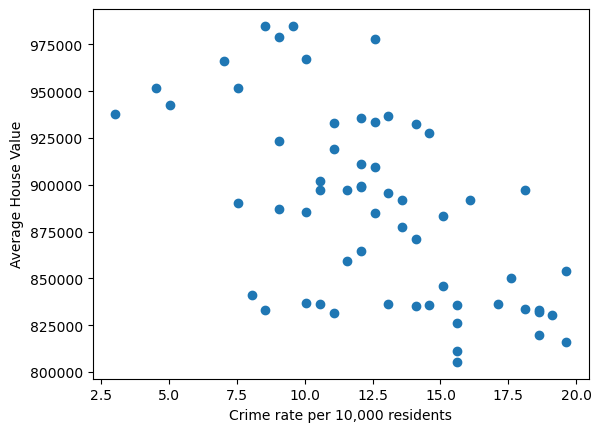

In [26]:
# For the violent crimes rates in Visitacion Valley, determine which pairs of factors are correlated. 
plt.scatter(violent_crimes_price_rate_index.iloc[:,-1],violent_crimes_price_rate_index.iloc[:,2])
plt.xlabel('Crime rate per 10,000 residents')
plt.ylabel('Average House Value')
plt.show()

The r-squared is: 0.3521191520235736


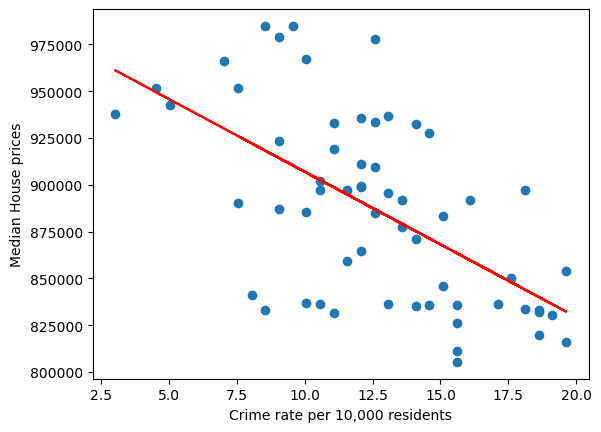

In [27]:
# Add the linear regression equation and line to plot
x_values = violent_crimes_price_rate['Crime Rate']
y_values = violent_crimes_price_rate['Price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Crime rate per 10,000 residents')
plt.ylabel('Median House prices')
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [28]:
nonviolent_crimes_price_rate
nonviolent_crimes_price_rate_index = nonviolent_crimes_price_rate.reset_index(drop=True)
violent_crimes_price_rate_index

,Date,Neighborhood,Price,Crime Rate
0,2018-01,Visitacion Valley,805443.17400,15.597484
1,2018-02,Visitacion Valley,811325.65910,15.597484
2,2018-03,Visitacion Valley,816348.22955,19.622642
3,2018-04,Visitacion Valley,819598.88570,18.616352
4,2018-05,Visitacion Valley,826377.13010,15.597484
5,2018-06,Visitacion Valley,833043.94900,18.616352
6,2018-07,Visitacion Valley,836581.50275,13.081761
7,2018-08,Visitacion Valley,836464.72155,10.566038
8,2018-09,Visitacion Valley,835124.17250,14.088050
9,2018-10,Visitacion Valley,835975.37600,14.591195


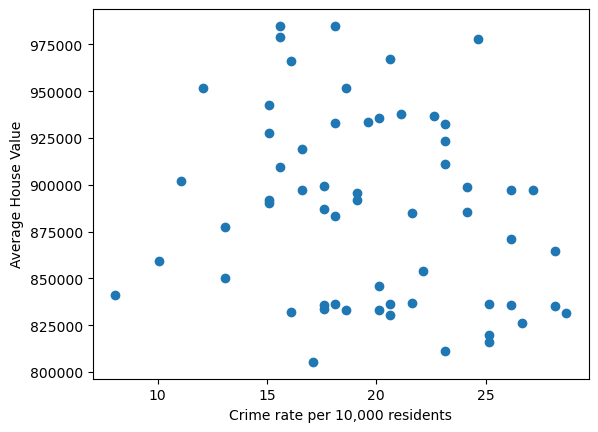

In [29]:
# For the violent crimes rates in Presidio, determine which pairs of factors are correlated. 
plt.scatter(nonviolent_crimes_price_rate_index.iloc[:,-1],nonviolent_crimes_price_rate_index.iloc[:,2])
plt.xlabel('Crime rate per 10,000 residents')
plt.ylabel('Average House Value')
plt.show()

The r-squared is: 0.04856109912931433


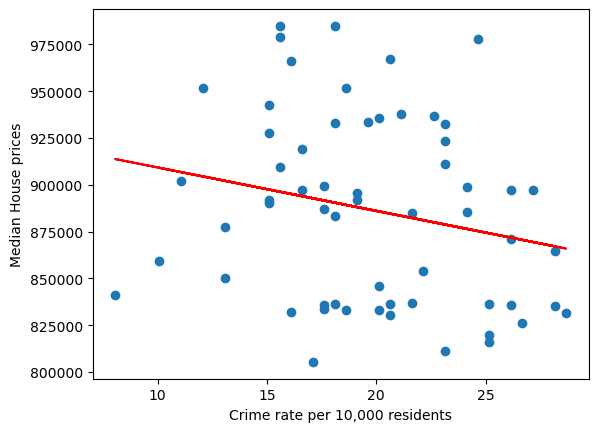

In [30]:
# Add the linear regression equation and line to plot
x_values = nonviolent_crimes_price_rate['Crime Rate']
y_values = nonviolent_crimes_price_rate['Price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Crime rate per 10,000 residents')
plt.ylabel('Median House prices')
print(f"The r-squared is: {rvalue**2}")
plt.show()
 